<a href="https://colab.research.google.com/github/ChristopherJonathan0/California-Housing-Prediction-using-Multiple-Linear-Regression/blob/main/California_Housing_Prediction_with_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Linear Regression Training Project**
Project ini menggunakan [dataset california_housing_test.csv](https://https://www.kaggle.com/datasets/vikramtiwari/california-housing-dataset-ml-crash-course). Dataset ini berisi informasi memberikan deskripsi demografis, sosial-ekonomi, dan karakteristik fisik perumahan per blok wilayah.
- longitude & latitude: lokasi geografis
- **housing_median_age**	Usia median rumah
- **total_rooms**	Total jumlah ruangan di blok tersebut
- **total_bedrooms**	Total jumlah kamar tidur
- **population**	Jumlah populasi di blok tersebut
- **households**	Jumlah rumah tangga
- **median_income**	Pendapatan rata rata
- **median_house_value**	Nilai median harga rumah

Di dalam project ini saya akan menganalisis harga rata-rata rumah dengan menggunakan multiple linear regression. Analisis ini dilakukan dengan melihat pengaruh dari beberapa variabel yang tersedia dalam California Housing Dataset, seperti median_income, housing_median_age, total_rooms, population, latitude, dan longitude, terhadap median_house_value. Dengan demikian, model yang dibangun tidak hanya mempertimbangkan satu faktor saja (misalnya pendapatan), melainkan gabungan dari beberapa faktor yang diduga memengaruhi harga rumah.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as ms
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score



In [2]:
df2 = pd.read_csv('/content/sample_data/california_housing_test.csv')

In [3]:
df2.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,3000.000000,3000.00000,3000.000000,3000.000000,3000.000000,3000.000000,3000.00000,3000.000000,3000.00000
mean,-119.589200,35.63539,28.845333,2599.578667,529.950667,1402.798667,489.91200,3.807272,205846.27500
std,1.994936,2.12967,12.555396,2155.593332,415.654368,1030.543012,365.42271,1.854512,113119.68747
min,-124.180000,32.56000,1.000000,6.000000,2.000000,5.000000,2.00000,0.499900,22500.00000
25%,-121.810000,33.93000,18.000000,1401.000000,291.000000,780.000000,273.00000,2.544000,121200.00000
50%,-118.485000,34.27000,29.000000,2106.000000,437.000000,1155.000000,409.50000,3.487150,177650.00000
75%,-118.020000,37.69000,37.000000,3129.000000,636.000000,1742.750000,597.25000,4.656475,263975.00000
max,-114.490000,41.92000,52.000000,30450.000000,5419.000000,11935.000000,4930.00000,15.000100,500001.00000


In [4]:
df2.corr(method='pearson')

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.925017,-0.064203,0.049865,0.070869,0.111572,0.051062,-0.018701,-0.050662
latitude,-0.925017,1.000000,-0.025143,-0.039632,-0.068245,-0.117318,-0.068296,-0.072363,-0.138428
housing_median_age,-0.064203,-0.025143,1.000000,-0.367850,-0.323154,-0.299888,-0.305171,-0.144315,0.091409
total_rooms,0.049865,-0.039632,-0.367850,1.000000,0.937749,0.838867,0.914116,0.221249,0.160427
total_bedrooms,0.070869,-0.068245,-0.323154,0.937749,1.000000,0.856387,0.970758,0.024025,0.082279
population,0.111572,-0.117318,-0.299888,0.838867,0.856387,1.000000,0.895530,0.032361,-0.001192
households,0.051062,-0.068296,-0.305171,0.914116,0.970758,0.895530,1.000000,0.048625,0.100176
median_income,-0.018701,-0.072363,-0.144315,0.221249,0.024025,0.032361,0.048625,1.000000,0.672695
median_house_value,-0.050662,-0.138428,0.091409,0.160427,0.082279,-0.001192,0.100176,0.672695,1.000000


/usr/local/lib/python3.12/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


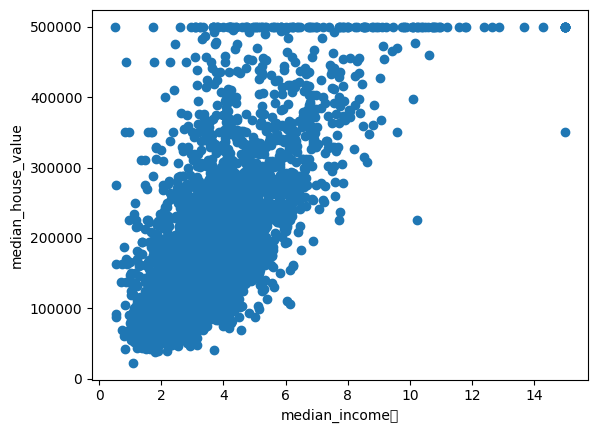

In [5]:
plt.xlabel('median_income	')
plt.ylabel('median_house_value')
plt.scatter(df2['median_income'], df2['median_house_value'])
plt.show()

In [6]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           3000 non-null   float64
 1   latitude            3000 non-null   float64
 2   housing_median_age  3000 non-null   float64
 3   total_rooms         3000 non-null   float64
 4   total_bedrooms      3000 non-null   float64
 5   population          3000 non-null   float64
 6   households          3000 non-null   float64
 7   median_income       3000 non-null   float64
 8   median_house_value  3000 non-null   float64
dtypes: float64(9)
memory usage: 211.1 KB


# **Pemodelan**

Dalam project ini, saya menggunakan Multiple Linear Regression dengan menggabungkan beberapa variabel independen untuk memprediksi variabel dependen. Pendekatan ini memungkinkan saya untuk menganalisis pengaruh simultan dari berbagai faktor terhadap hasil yang ingin diprediksi, serta mengidentifikasi variabel mana yang memiliki kontribusi paling signifikan.

In [49]:
x = df2[['median_income', 'households','total_bedrooms','total_rooms','housing_median_age','longitude','latitude']]
y = df2['median_house_value']
X_train, X_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.7, random_state=0)
ml = LinearRegression()
ml.fit(X_train, y_train)


LinearRegression()

In [50]:
print('intercept=', ml.intercept_)
print('slope=', ml.coef_)

intercept= -4137008.7354965196
slope= [ 4.06140194e+04 -6.43760035e+01  1.66953222e+02 -1.60583096e+01
  1.00295522e+03 -4.83756154e+04 -4.60710263e+04]


data_input = np.array([[8.3252, 300, 150, 1000, 30, -122.23, 37.88]])
Penjelasan:

*   median_income = 8.3252 → pendapatan median per rumah tangga, dalam puluhan ribu USD (jadi sekitar $83.252)
*   households = 300 → jumlah rumah tangga di blok tersebut
*   total_bedrooms = 150 → jumlah kamar tidur total di blok tersebut
*   total_rooms = 1000 → jumlah ruangan total di blok tersebut
*   housing_median_age = 30 → usia median rumah di blok tersebut (tahun)
*   longitude = -122.23 → garis bujur lokasi
*   latitude = 37.88 → garis lintang lokasi

In [51]:
data_input = np.array([[8.3252, 300, 150, 1000, 30, -122.23, 37.88]])
hasil = ml.predict(data_input)
print(hasil)

[388652.62071563]


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


Berdasarkan model Linear Regression dan fitur yang diberikan, rumah/blok tersebut diperkirakan bernilai sekitar $388 ribu.

In [52]:
ml.score(X_test, y_test)

0.5923034974028927

In [53]:
ml.score(X_train, y_train)

0.6128508836646077

In [94]:
MAE = mean_absolute_error(y_test, y_pred)
print("MAE:", MAE)

MAE: 52841.55230810296


In [93]:
MSE = mean_squared_error(y_test, y_pred)
print("MSE",MSE)

MSE 5163793667.75636


In [92]:
R2 = r2_score(y_test, y_pred)
print("R2Score:",R2)

R2Score: 0.5923034974028927


In [58]:
ml.coef_

array([ 4.06140194e+04, -6.43760035e+01,  1.66953222e+02, -1.60583096e+01,
        1.00295522e+03, -4.83756154e+04, -4.60710263e+04])

In [59]:
ml.intercept_

np.float64(-4137008.7354965196)